In [1]:
#import all the required libraries
import nltk
import math
from nltk.tokenize import word_tokenize, RegexpTokenizer
import numpy as np
import pandas as pd
import warnings
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
import collections
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

sns.set(style='whitegrid', context='notebook', palette='cubehelix')

In [2]:
#download dataset
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
#Mount Google drive, provide auth code to write/read from G drive
drive.mount("/drive")
#warnings.filterwarnings('ignore')

Mounted at /drive


In [5]:
#Import the dataset-file
df = pd.read_csv("/drive/My Drive/Colab Notebooks/vim_feature.csv") 
print(df.shape)
df.head()

(1132, 8)


,post,title,date_created,author,post_sentiment,title_sentiment,reddit_score,num_comments
0,"Previously, vim-clap's main feature is the ful...",vim-clap: to be a performant fuzzy finder and ...,01-01-2020,liuchengxu,Positive,Neutral,1,41
1,"Hello all, recently I wrote a new vim plugin '...",New plugin: vim-text-lists,01-01-2020,arumoy_shome,Positive,Neutral,1,0
2,,How many of yiuhrol keep accidentally doing th...,01-01-2020,nebulaeandstars,Neutral,Negative,1,0
3,The task i'm trying to accomplish is to remove...,What would be the best way to format this code...,01-01-2020,eliseu_videira,Positive,Positive,1,24
4,"I've been using vim for a couple of years, and...",TIL - Run lines of code and get the output ins...,01-01-2020,Hollow_5oul,Positive,Neutral,1,25


## *Plot the overall sentiment of posts for all 3 months:*

Positive    599
Neutral     395
Negative    138
Name: post_sentiment, dtype: int64


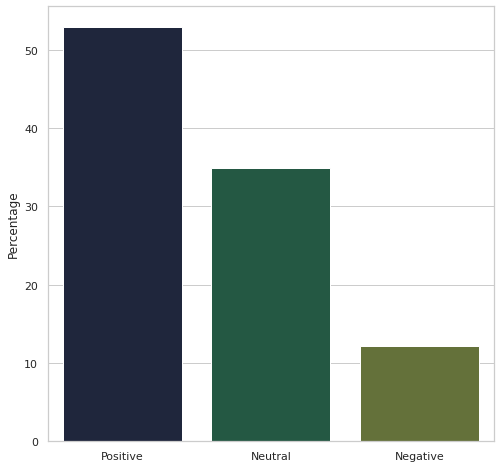

In [6]:
print(df.post_sentiment.value_counts())

fig, ax = plt.subplots(figsize=(8, 8))
counts = df.post_sentiment.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Positive', 'Neutral', 'Negative'])
ax.set_ylabel("Percentage")

plt.show()

## *Plot the overall sentiment of titles for all 3 months:*
We can observe that majority of titles have a neutal title, and hence we will not be using these values for further analysis, as it doesn't tell anything new about our dataset.

Neutral     777
Positive    252
Negative    103
Name: title_sentiment, dtype: int64


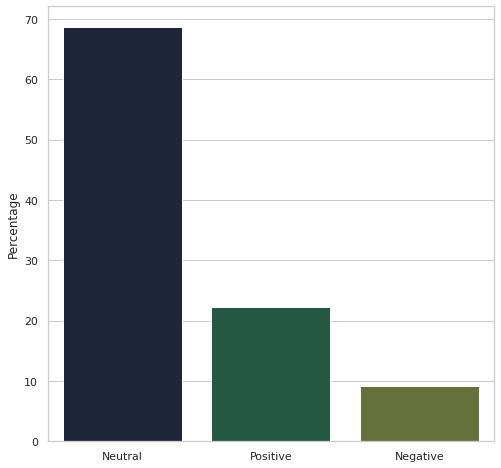

In [7]:
print(df.title_sentiment.value_counts())

fig, ax = plt.subplots(figsize=(8, 8))
counts = df.title_sentiment.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Neutral', 'Positive', 'Negative'])
ax.set_ylabel("Percentage")

plt.show()

In [8]:
#tokenizer function to get the most used keywords
tokenizer = RegexpTokenizer(r'\w+')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

## *Plot the Word frequency distribution for positive and negative words:*
Since we have more positively labelled posts, it is expected that positive words or keywords are larger than negative words or keywords.


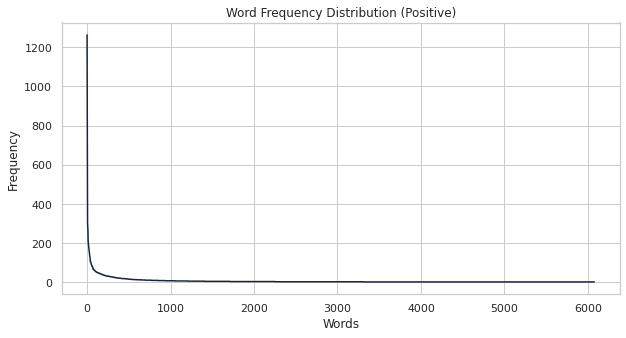

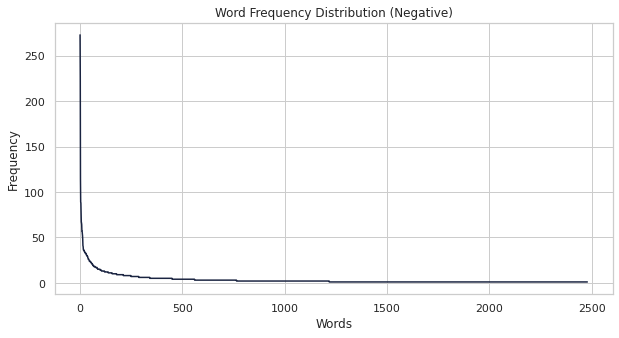

In [9]:
pos_lines = list(df[df.post_sentiment == "Positive"].post)
pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

y_val = [x[1] for x in pos_freq.most_common()]
fig = plt.figure(figsize=(10,5))
plt.plot(y_val)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()


neg_lines = list(df[df.post_sentiment == "Negative"].post)
neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

y_val = [x[1] for x in neg_freq.most_common()]
fig2 = plt.figure(figsize=(10,5))
plt.plot(y_val)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

## *Plot the most used keywords:*
We see the words vim, file, plugin to be largest hence most frequent.
(The keywords try to make the reddit logo)




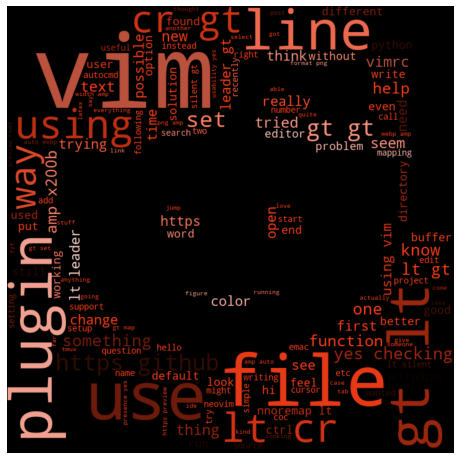

In [10]:
Mask = np.array(Image.open("/drive/My Drive/Colab Notebooks/reddit.png"))

# We use the ImageColorGenerator library from Wordcloud 
image_colors = ImageColorGenerator(Mask)
mostUsedWords = ' '.join(text for text in pos_tokens)
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(mostUsedWords)
plt.figure(figsize=(8,16))
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

## *Find the top authors for all 3 months:*
(By the frequency of their posts)


[Text(0, 0.5, 'Author'), Text(0.5, 0, 'No of Posts')]

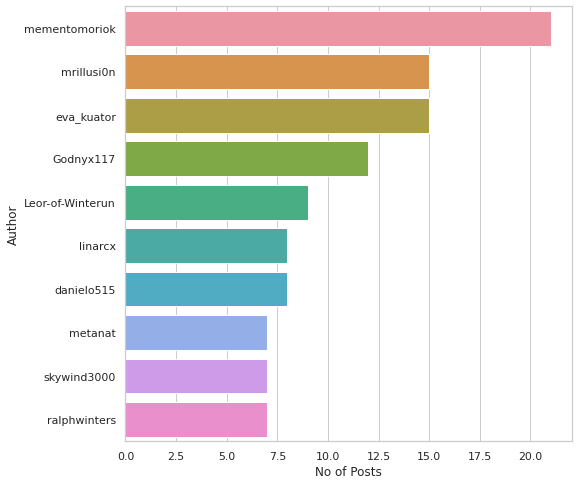

In [11]:
authors = list(df['author'])
top_authors = collections.Counter(authors)
top10authors = top_authors.most_common(10)
df_author = pd.DataFrame(top10authors)

fig, ax = plt.subplots(figsize=(8, 8))
author_plot = df_author.nlargest(10,columns=1)
sns.barplot(data=author_plot,y=0,x=1)
ax.set(xlabel='No of Posts', ylabel='Author')

# *Plot of Reddit score (Number of Upvotes - Downvotes), Number of Comments and Total Engagement plot along the date of creation.*

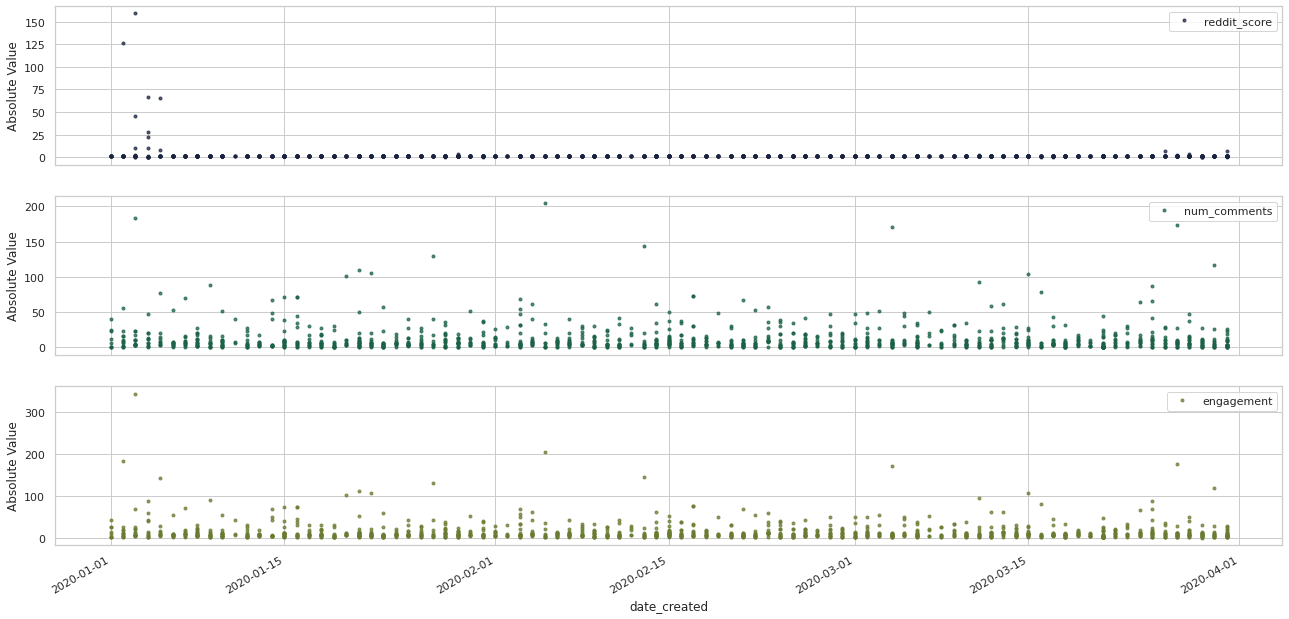

In [12]:
df_date = df
df_date['date_created']= pd.to_datetime(df_date['date_created'],dayfirst=True) 
df_date.set_index('date_created', inplace=True)

df_date['Year'] = df_date.index.year
df_date['Month'] = df_date.index.month
df_date['engagement'] =df['reddit_score']+df['num_comments'] #calculating engagement of a post as reddit score + comments

cols_plot = ['reddit_score', 'num_comments','engagement']
axes = df_date[cols_plot].plot(marker='.', alpha=0.75, linestyle='None', figsize=(22, 11), subplots=True)
for ax in axes:
    ax.set_ylabel('Absolute Value')

## *Plot the overall sentiment of posts for month wise:*
1 represent the month of January </br>
2 represent the month of February  </br>
3 represent the month of March  </br>

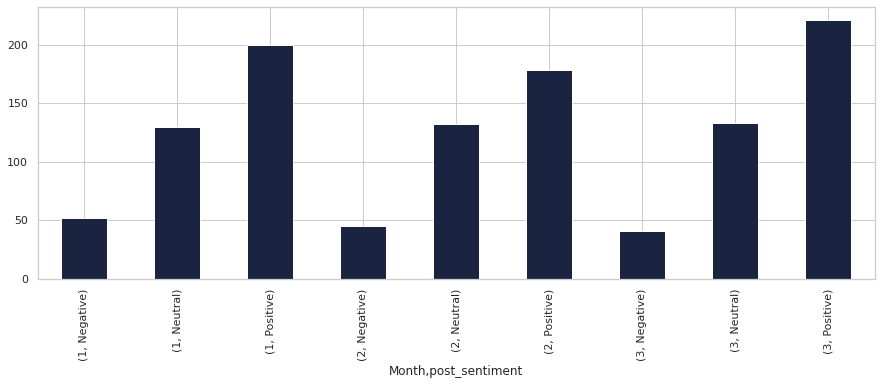

In [14]:
counts = df_date.groupby(['Month', 'post_sentiment']).agg(len)
df_counts = counts['post']
fig = plt.figure(figsize=(15,5))
df_counts.plot(kind='bar') 
plt.show() 
